Develop a program to implement k-means clustering using Wisconsin Breast Cancer data set and visualize
the clustering result. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data =  load_breast_cancer(as_frame=True)
df = data.frame
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
X = data.data
y = data.target

In [4]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [5]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster = kmeans.fit_predict(X_scaled)

In [6]:
confusion_matrix(y,cluster)

array([[175,  37],
       [ 13, 344]], dtype=int64)

In [7]:
print(classification_report(y,cluster))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



In [8]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

In [9]:
df = pd.DataFrame(reduced_data, columns=['pc1','pc2'])
df["cluster"] = cluster
df["target"] = y
df

,pc1,pc2,cluster,target
0,9.192837,1.948583,0,0
1,2.387802,-3.768172,0,0
2,5.733896,-1.075174,0,0
3,7.122953,10.275589,0,0
4,3.935302,-1.948072,0,0
...,...,...,...,...
564,6.439315,-3.576817,0,0
565,3.793382,-3.584048,0,0
566,1.256179,-1.902297,0,0
567,10.374794,1.672010,0,0


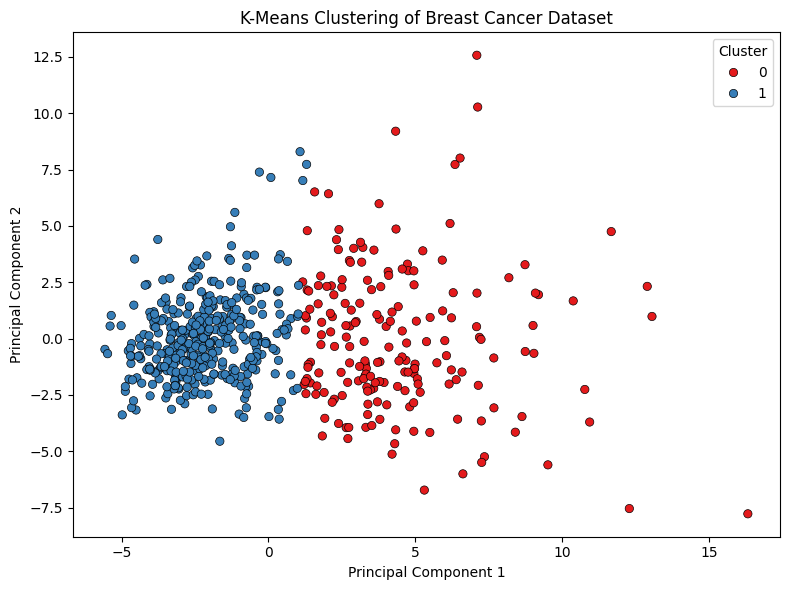

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pc1', y='pc2', hue='cluster', palette='Set1',  edgecolor='black')
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

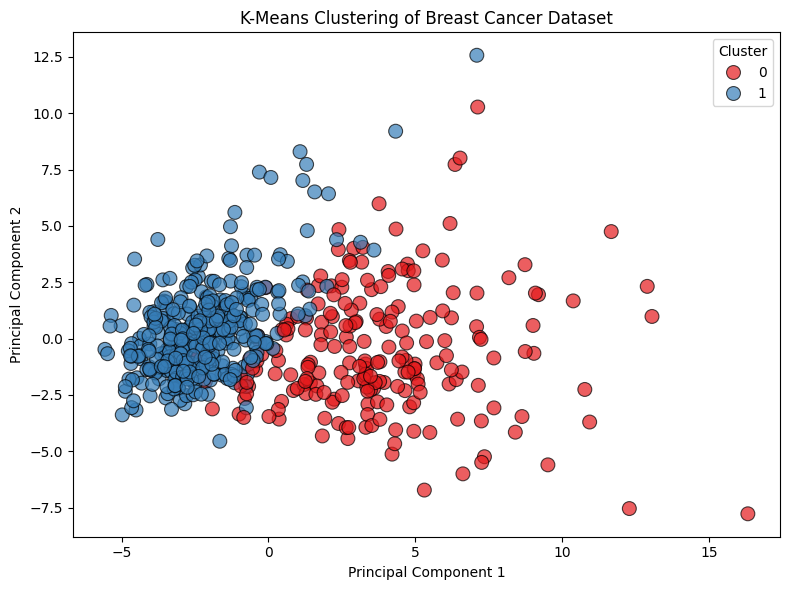

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pc1', y='pc2', hue='target', palette='Set1', s=100, edgecolor='black', alpha=0.7)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

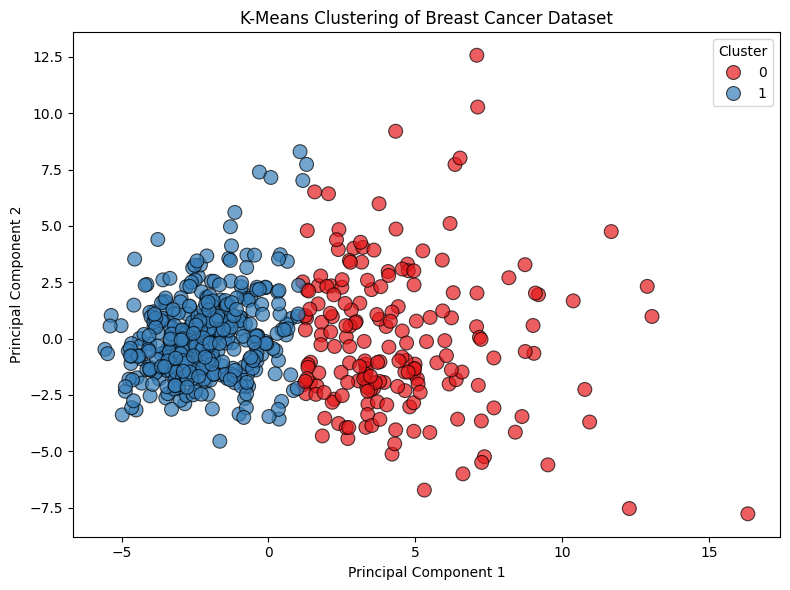

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pc1', y='pc2', hue='cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

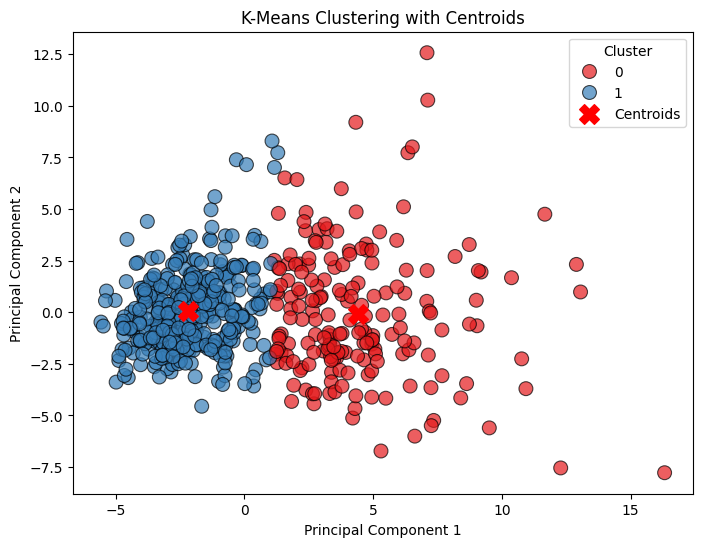

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pc1', y='pc2', hue='cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()